In [2]:
#Importing dataset from sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [3]:
#Importing Libraries for required procedures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = fetch_california_housing()

In [16]:
#Converting the dataset into pandas dataframe and assigning it field names
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names

target = pd.DataFrame(df.target)
target.rename(columns={0: 'Target'}, inplace=True)

#Adding the labels to the dataset for training purpose
housing = pd.concat([dataset,target],axis=1)
print(housing.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


In [17]:
#Final Dataset with all raw fields
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
#Getting # rows and # columns
print("dimension of housing data: {}".format(dataset.shape))

dimension of housing data: (20640, 8)


In [18]:
#Getting variable types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**We can see above that all the variables are numeric and do not have any missing values.**

In [20]:
# Creating Co-relation matrix to understand the dependencies between variables
corrM = housing.corr()
corrM

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [21]:
corrTarget = corrM['Target']
corrTarget.sort_values(ascending=False)

Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64

**Here, we can see that Median Income is the most directly related to Target price. So we can use it to train our model.**

In [22]:
medInc = housing['MedInc']
price = housing['Target']

x=np.array(medInc).reshape(-1,1)
y=np.array(price).reshape(-1,1)
print(x)
print(y)

[[8.3252]
 [8.3014]
 [7.2574]
 ...
 [1.7   ]
 [1.8672]
 [2.3886]]
[[4.526]
 [3.585]
 [3.521]
 ...
 [0.923]
 [0.847]
 [0.894]]


In [23]:
#Trainig the model with the help of Gradient Descent
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [24]:
model_mse = mean_squared_error(x,y)
print('MSE: ', math.sqrt(model_mse))
print('R Squared Value: ', model.score(x,y))

MSE:  2.274094362549284
R Squared Value:  0.4734474918071989


We can see that the R squared value is 0.47, that means there is some linear relationship between the two variables median income ans price. Let's plot the prediction and correct values in a scatter plot for visual understanding.

In [25]:
#Getting the b0 and b1 parameters of the model
#b1 of our model
print(model.coef_[0])
#b0 of our model
print(model.intercept_[0])

[0.41793849]
0.4508557670326785


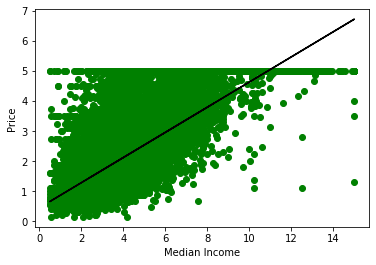

In [26]:
plt.scatter(x,y,color='green')
plt.plot(x,model.predict(x),color='black')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.show()